# Melodia 0.1 - Examples

In [3]:
import os 

import numpy as np
import seaborn as sns
import melodia as mel
import matplotlib.pyplot as plt

from Bio.PDB import PDBParser, PDBIO

from sklearn.preprocessing import StandardScaler

## Creating a Panda Dataframe from a structure file

### Read a BioPython compatible file 

In [4]:
file_name = '2k5x.pdb'
dfo = mel.geometry_from_structure_file(file_name)
dfo

,id,code,chain,order,name,curvature,torsion,arc_length,writhing,phi,psi
0,0,2K5X,A,1,MET,1.171567,0.052793,8.114143,0.010657,0.000000,-162.771091
1,1,2K5X,A,2,GLU,1.171567,0.052793,7.744241,0.010657,-82.501456,55.322023
2,2,2K5X,A,3,LEU,0.516691,-0.049646,7.651813,0.010657,-104.765995,151.772894
3,3,2K5X,A,4,LYS,0.691968,-0.162003,7.697065,-0.044531,-91.287246,152.272637
4,4,2K5X,A,5,HIS,0.726271,-0.093555,8.377249,-0.064321,-78.677457,-25.081189
...,...,...,...,...,...,...,...,...,...,...,...
215,129,2K5X,B,130,ILE,0.374667,0.169407,8.658262,0.222338,-77.797020,-31.977884
216,130,2K5X,B,131,HIS,0.532056,-0.019662,8.427249,-0.003986,-92.569181,21.157166
217,131,2K5X,B,132,ARG,0.169288,-0.612796,8.394909,-0.103905,55.729215,55.176435
218,132,2K5X,B,133,GLY,0.279679,-0.081681,8.460548,-0.103905,104.961551,0.000000


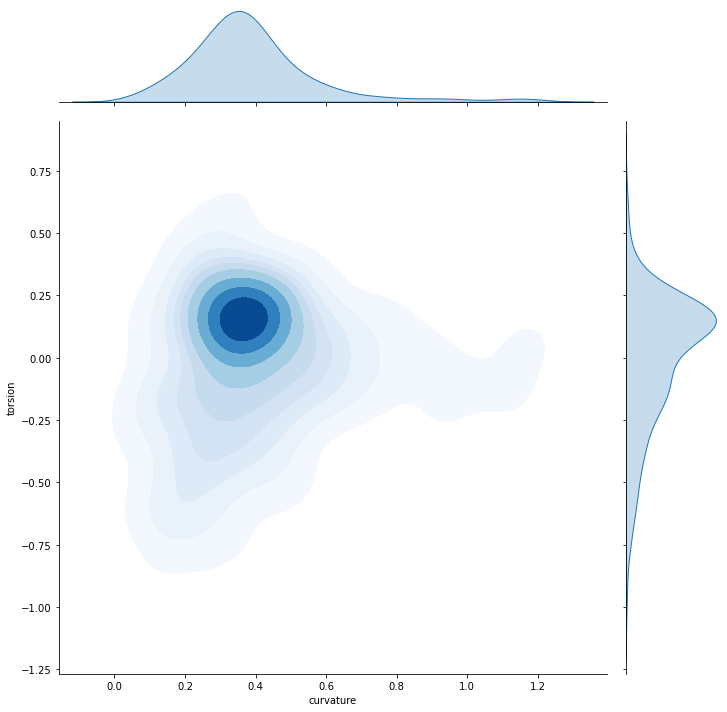

In [5]:
cmap = sns.color_palette("Blues", as_cmap=True)
sns.jointplot(x='curvature', y='torsion', data=dfo, kind='kde', cmap=cmap, height=10, fill=True)
plt.show();

### Apply Scikit Standard Scaler to geometric attributes

In [6]:
df = dfo[(dfo['name'] == 'GLY')].copy()
#features = ['curvature', 'torsion', 'arc_length', 'writhing']
#autoscaler = StandardScaler()
#df[features] = autoscaler.fit_transform(df[features])

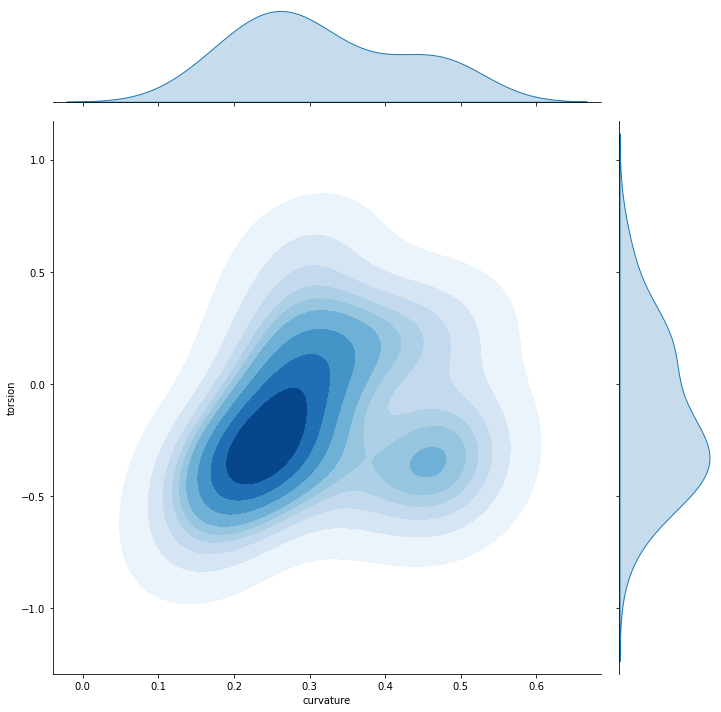

In [7]:
cmap = sns.color_palette("Blues", as_cmap=True)
sns.jointplot(x='curvature', y='torsion', data=df, kind='kde', cmap=cmap, height=10, fill=True)
#sns.jointplot(x='curvature', y='torsion', data=df, kind='hex', color='b', height=10)
plt.show();

## Creating geometric data from a BioPython parsed structure

In [8]:
parser = PDBParser()
name, ext = os.path.splitext(file_name)
structure = parser.get_structure(name, file_name)

### Create a Panda Dataframe from the parser

In [9]:
df = mel.geometry_from_structure(structure)
df

,id,code,chain,order,name,curvature,torsion,arc_length,writhing,phi,psi
0,0,2K5X,A,1,MET,1.171567,0.052793,8.114143,0.010657,0.000000,-162.771091
1,1,2K5X,A,2,GLU,1.171567,0.052793,7.744241,0.010657,-82.501456,55.322023
2,2,2K5X,A,3,LEU,0.516691,-0.049646,7.651813,0.010657,-104.765995,151.772894
3,3,2K5X,A,4,LYS,0.691968,-0.162003,7.697065,-0.044531,-91.287246,152.272637
4,4,2K5X,A,5,HIS,0.726271,-0.093555,8.377249,-0.064321,-78.677457,-25.081189
...,...,...,...,...,...,...,...,...,...,...,...
215,129,2K5X,B,130,ILE,0.374667,0.169407,8.658262,0.222338,-77.797020,-31.977884
216,130,2K5X,B,131,HIS,0.532056,-0.019662,8.427249,-0.003986,-92.569181,21.157166
217,131,2K5X,B,132,ARG,0.169288,-0.612796,8.394909,-0.103905,55.729215,55.176435
218,132,2K5X,B,133,GLY,0.279679,-0.081681,8.460548,-0.103905,104.961551,0.000000


### Create a dictionary of attribute from the parser

In [10]:
geo = mel.geometry_dict_from_structure(structure)
geo['0:A'].residues[0]

ResidueGeometry(name='MET', chain='A', res_num=0, res_order=1, curvature=1.1715667454704115, torsion=0.05279292619204095, arc_len=8.114142887215975, writhing=0.010656569241575084, phi=0.0, psi=-162.77109080718967, res_ann={})

#### Set the b-factor as an attribute 

In [11]:
mel.bfactor_from_geo(structure=structure, attribute='torsion')

#### View structure as a putty model

In [12]:
#mel.view_putty(structure)
mel.view_putty(structure[0], radius_scale=1.4, width=800, height=600)

Box(children=(NGLWidget(layout=Layout(height='auto', width='auto')),), layout=Layout(height='600px', width='80…

### Save the structure to a PDB file with the new bfactors

In [13]:
io = PDBIO()
io.set_structure(structure)
io.save('out.pdb')

## Acess the Propensity Table for a target residue

In [14]:
ptable = mel.PropensityTable()

In [15]:
phi = -82.0
psi =  55.0
ptable.get_score(target='F', residue='A', phi=phi, psi=psi)

-5